In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Set matplotlib style
plt.style.use('ggplot')

# Paths

In [2]:
# Paths
fp_main = Path('/Users/asgerkromand/Library/CloudStorage/OneDrive-UniversityofCopenhagen/2. SODAS/5 horingsportal')
fp_data = fp_main / 'data'

# Import 

In [3]:
# Import metadata from scrape of Høringsportalen
df = pd.read_csv(fp_data / 'metadata.csv').drop(columns='Unnamed: 0')
df.info()

# Import overview over folders with answers (.jsonl)
with open(fp_data / 'constructed' / 'answer_overview.jsonl', 'r') as f:
    answer_overview = [json.loads(line) for line in f]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15852 entries, 0 to 15851
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Officiel titel        14455 non-null  object 
 1   Beskrivelse           13227 non-null  object 
 2   Høringstype           15852 non-null  object 
 3   Myndighed             15852 non-null  object 
 4   Område                15852 non-null  object 
 5   Høringsfrist          15852 non-null  object 
 6   Arkiveringsdato       15852 non-null  object 
 7   Høringsår             15852 non-null  object 
 8   Publiceringsdato      15852 non-null  object 
 9   details               0 non-null      float64
 10  Høringsnr             15852 non-null  int64  
 11  Ikrafttrædelsesdato   8512 non-null   object 
 12  Kontaktperson         6726 non-null   object 
 13  Kontaktperson e-mail  6646 non-null   object 
 14  Bemærkninger          843 non-null    object 
dtypes: float64(1), int6

In [4]:
# Update the DataFrame with the answer_overview data
for answer in answer_overview:
    folder_id = int(answer['folder'])  # Ensure 'folder' is an integer
    if folder_id in df['Høringsnr'].values:
        # Select the row(s) matching the folder_id
        idx = df[df['Høringsnr'] == folder_id].index
        
        # Update the columns for the matching rows
        df.loc[idx, 'has_answer'] = True
        df.loc[idx, 'answer_count'] = len(answer['files'])
        df.at[idx[0], 'answer_files'] = answer['files']  # Use `at` to safely assign a list
    else:
        print(f"Warning: Folder {folder_id} not found in 'Høringsnr' column.")

print("Metadata successfully updated.")

Metadata successfully updated.


In [18]:
df

,Officiel titel,Beskrivelse,Høringstype,Myndighed,Område,Høringsfrist,Arkiveringsdato,Høringsår,Publiceringsdato,details,Høringsnr,Ikrafttrædelsesdato,Kontaktperson,Kontaktperson e-mail,Bemærkninger,has_answer,answer_count,answer_files
0,Gennemførelse af direktivet om bekæmpelse af f...,Gennemførelse af direktivet om bekæmpelse af f...,Betænkning,Justitsministeriet,Samfundsøkonomi og statistik,24-08-2012,19-09-2012,2011/2012,29-08-2012,NaN,15970,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,Bekendtgørelse om tilskud til investering i gr...,Fiskeristyrelsen sender hermed bekendtgørelse ...,Bekendtgørelser,Fiskeristyrelsen,Erhverv,16-04-2024,16-06-2024,2023/2024,02-04-2024,NaN,68524,01-05-2024,NaN,NaN,NaN,NaN,NaN,nan
2,Høring af udkast til bekendtgørelse om opgørel...,NaN,Bekendtgørelser,Finanstilsynet,Samfundsstruktur,08-03-2016,08-05-2016,2015/2016,09-02-2016,NaN,59263,01-07-2016,Charlotte Brøbecher Christensen,cbc@ftnet.dk,NaN,NaN,NaN,nan
3,Lov om Klagemyndigheden for offentlige erhverv...,Med lovforslaget om klagemyndighed for offentl...,Lovforslag,Erhvervsministeriet,Erhverv,08-04-2019,08-06-2019,2018/2019,11-03-2019,NaN,62822,NaN,NaN,NaN,NaN,NaN,NaN,nan
4,L 17 - Forslag til lov om ændring af kulbrinte...,L 17 - Forslag til lov om ændring af kulbrinte...,Lovforslag,Skatteministeriet,Skatter og afgifter,14-08-2017,14-10-2017,2016/2017,26-06-2017,NaN,60749,NaN,NaN,NaN,NaN,True,1.0,[L_17_H�ringssvar.pdf]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15847,Forslag til Lov om forsøg i folkekirken,"Lovforslaget udgør en ramme for, at menighedsr...",Lovforslag,Kirkeministeriet,Kirke,27-01-2017,16-01-2017,2016/2017,12-12-2016,NaN,60164,01-05-2017,NaN,NaN,Høringsfristen er den 21. december 2016 forlæn...,NaN,NaN,nan
15848,"Bekendtgørelse om indretning, etablering og dr...",Den foreslåede bekendtgørelse indeholder en ræ...,Bekendtgørelser,Miljøstyrelsen,Natur og klima,22-02-2010,22-04-2010,2009/2010,21-01-2010,NaN,13496,NaN,"Preben Bruun, Jens Kjølholt",NaN,NaN,NaN,NaN,nan
15849,NaN,Trafikstyrelsen nedsætter gebyret for udstedel...,Bekendtgørelser,"Trafik-, Bygge- og Boligstyrelsen",Trafik og transport,10-12-2014,10-02-2015,2014/2015,25-11-2014,NaN,42234,01-01-2015,Lis Caspersen,info@trafikstyrelsen.dk,NaN,NaN,NaN,nan
15850,Høring over forslag til ændrede grænseværdier ...,Forslaget vedrører grænseværdier for følgende\...,EU-Dokumenter,Fødevarestyrelsen,Erhverv,05-09-2013,05-11-2013,2012/2013,02-09-2013,NaN,17036,NaN,Gudrun Hilbert,guh@fvst.dk,NaN,NaN,NaN,nan


# Visualize


## By year and hearing type

### All hearings 

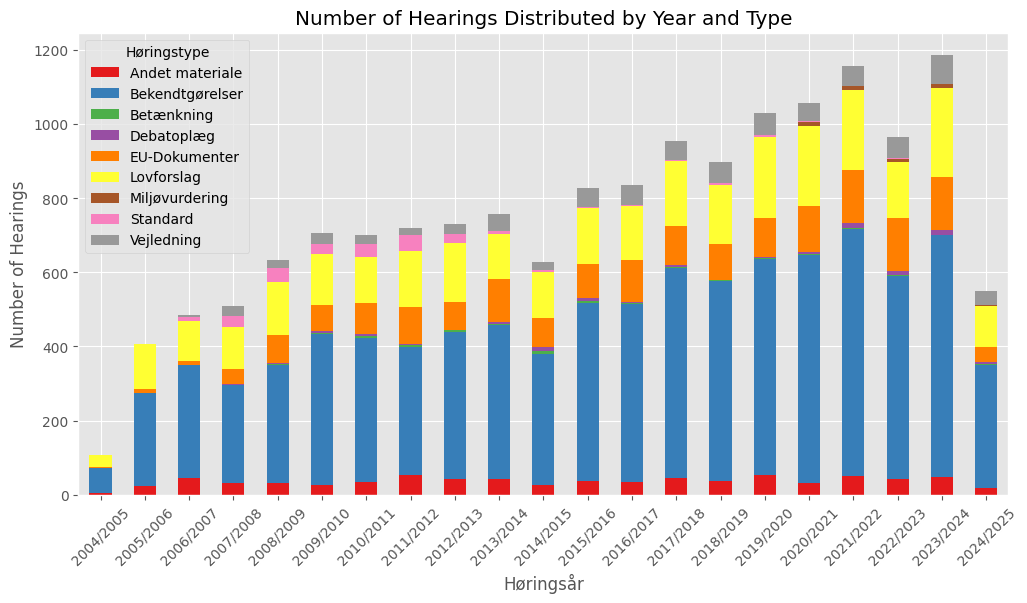

In [13]:
# Sort by 'Høringsår'
df = df.sort_values('Høringsår')

# Pre-aggregate the data to get counts of each type per year
data_grouped = df.groupby(['Høringsår', 'Høringstype']).size().reset_index(name='Count')

# Create a barplot with stacked categories
colors = sns.color_palette("Set1")
pivot_data = data_grouped.pivot(index='Høringsår', columns='Høringstype', values='Count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)


# Add plot styling
plt.xticks(rotation=45)
plt.ylabel('Number of Hearings')
plt.title('Number of Hearings Distributed by Year and Type')
plt.legend(title='Høringstype')
plt.show()

### Hearings with answers

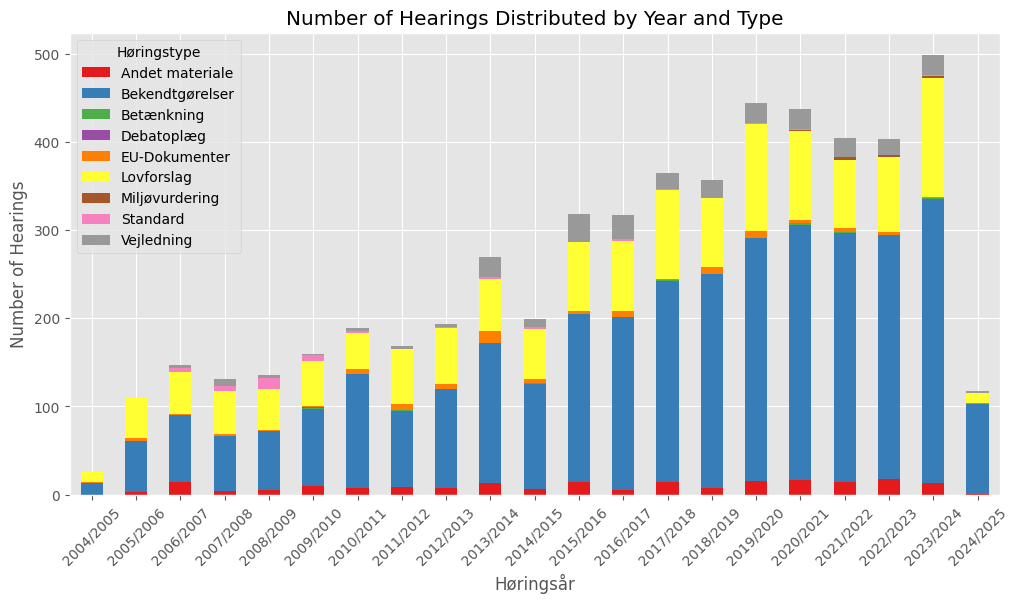

In [14]:
sub_df = df[df['has_answer'] == True]

# Pre-aggregate the data to get counts of each type per year
data_grouped = sub_df.groupby(['Høringsår', 'Høringstype']).size().reset_index(name='Count')

# Create a barplot with stacked categories
pivot_data = data_grouped.pivot(index='Høringsår', columns='Høringstype', values='Count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Add plot styling
plt.xticks(rotation=45)
plt.ylabel('Number of Hearings')
plt.title('Number of Hearings Distributed by Year and Type')
plt.legend(title='Høringstype')
plt.show()

In [27]:
df.head(5)

,Officiel titel,Beskrivelse,Høringstype,Myndighed,Område,Høringsfrist,Arkiveringsdato,Høringsår,Publiceringsdato,details,Høringsnr,Ikrafttrædelsesdato,Kontaktperson,Kontaktperson e-mail,Bemærkninger,has_answer,answer_count,answer_files
173,Pensionsafkastbeskatningsloven m.v.,NaN,Lovforslag,Skatteministeriet,Samfundsøkonomi og statistik,22-08-2005,31-12-2005,2004/2005,14-12-2006,NaN,10439,NaN,NaN,NaN,NaN,NaN,NaN,nan
9385,"Register, penge og andre værdier",Bekendtgørelse om optagelse i Erhvervs- og Sel...,Bekendtgørelser,Erhvervsstyrelsen,Erhverv,29-07-2005,01-06-2006,2004/2005,18-07-2005,NaN,10459,NaN,NaN,NaN,NaN,NaN,NaN,nan
8655,Høring - ændring af bekg. om mælkeprod.,Fødevarestyrelsens interne og eksterne hørings...,Bekendtgørelser,Fødevarestyrelsen,Sundhed,18-07-2005,18-07-2005,2004/2005,05-06-2005,NaN,10402,NaN,NaN,NaN,NaN,NaN,NaN,nan
1546,Bkg. om større uheld med farlige stoffer,Udkast til bekendtgørelse om kontrol med risik...,Bekendtgørelser,Miljøstyrelsen,Ejendomme og byggeri,02-09-2005,30-12-2005,2004/2005,15-07-2005,NaN,10454,NaN,NaN,NaN,NaN,NaN,NaN,nan
6351,Afmærkningslygter på udrykningskøretøjer,Høring vedrørende anvendelse af gule afmærknin...,Bekendtgørelser,"Trafik-, Bygge- og Boligstyrelsen",Trafik og transport,30-09-2005,31-10-2005,2004/2005,15-07-2005,NaN,10449,NaN,NaN,NaN,NaN,NaN,NaN,nan


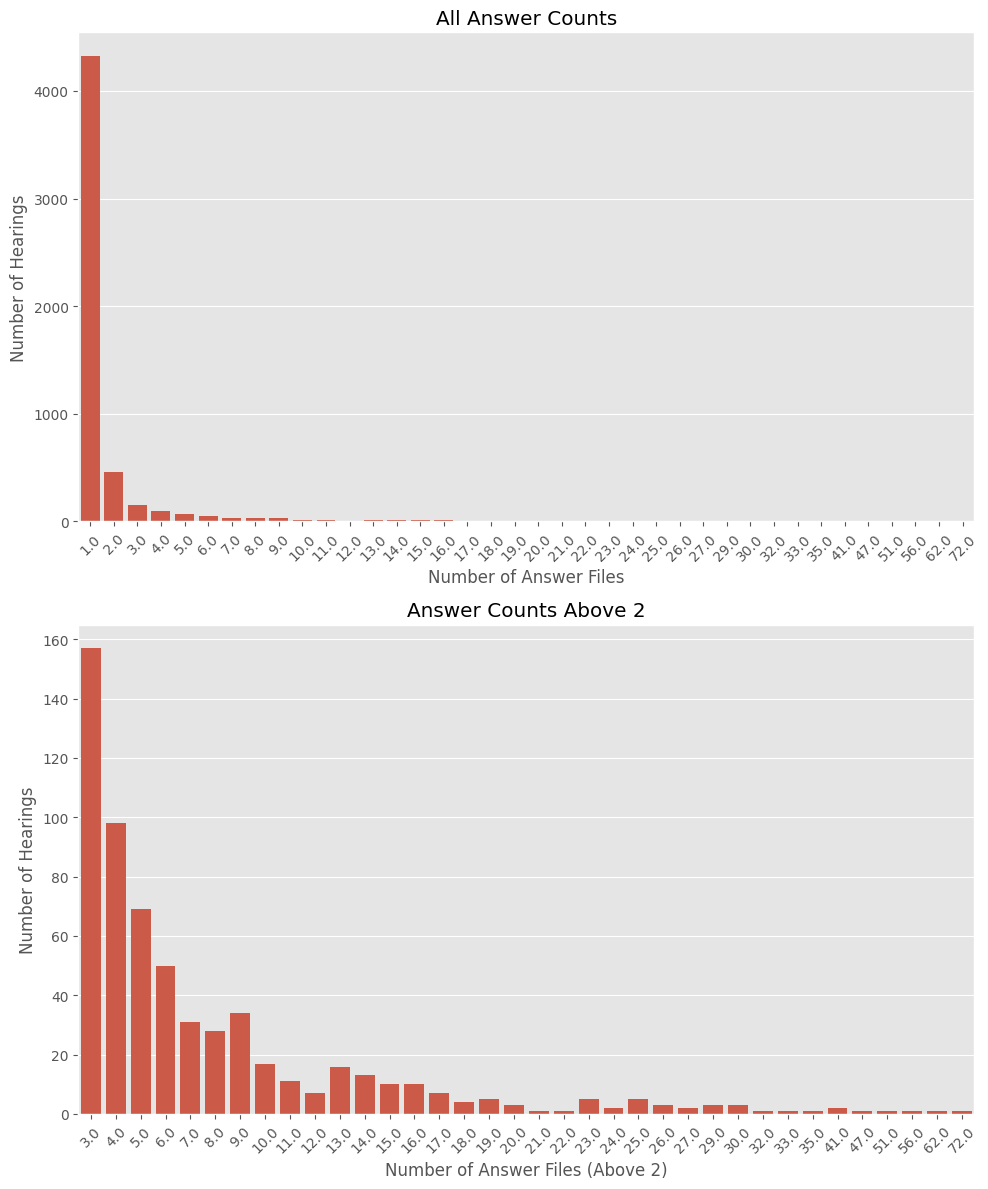

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Stacked vertically

# First subplot: Count plot for all data
sns.countplot(data=sub_df, x='answer_count', ax=axes[0])
axes[0].set_xlabel('Number of Answer Files')
axes[0].set_ylabel('Number of Hearings')
axes[0].set_title('All Answer Counts')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot: Count plot for answer_count > 2
filtered_df = sub_df[sub_df['answer_count'] > 2]
sns.countplot(data=filtered_df, x='answer_count', ax=axes[1])
axes[1].set_xlabel('Number of Answer Files (Above 2)')
axes[1].set_ylabel('Number of Hearings')
axes[1].set_title('Answer Counts Above 2')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
# Check the Høringsnr for top 10 answer counts
top10 = sub_df.nlargest(10, 'answer_count')
top10[['Høringsnr', 'answer_count', 'answer_files']]

,Høringsnr,answer_count,answer_files
1074,15978,72.0,"[H�ringssvar_fra_FSR_Danske_Revisorer.pdf, H�r..."
5126,63255,62.0,[H�ringssvar_-_Dansk_Samfundsmedicinsk_Selskab...
4334,67638,56.0,[H�ringssvar_Dansk_Selskab_for_Retsmedicin.pdf...
12894,66725,51.0,[H�ringssvar_-_Dansk_Samfundsmedicinsk_Selskab...
2928,60866,47.0,"[K�benhavns_Universitet_h�ringssvar_2.pdf, B�r..."
3786,11499,41.0,"[H�ringssvar_Andersen_motors.DOC, H�ringssvar_..."
3962,14906,41.0,"[H�ringssvar_-_ATP.pdf, H�ringssvar_-_Axapoint..."
1543,63394,35.0,[H�ringssvar_fra_Dansk_Præhospital_Selskab_ved...
15657,11769,33.0,"[H�ringssvar_-_KL_Dataf�lgeseddel.pdf, H�rings..."
5663,16069,32.0,[H�ringssvar_fra_Foreningen_af_kommunale_socia...


In [42]:
# Show some examples of old files
old_files = sub_df.sort_values('Høringsår').head(5)

In [43]:
old_files

,Officiel titel,Beskrivelse,Høringstype,Myndighed,Område,Høringsfrist,Arkiveringsdato,Høringsår,Publiceringsdato,details,Høringsnr,Ikrafttrædelsesdato,Kontaktperson,Kontaktperson e-mail,Bemærkninger,has_answer,answer_count,answer_files
7017,Finansielle rapporter for kreditins. etc,Udkast til bekendtgørelse om finansielle rappo...,Bekendtgørelser,Finanstilsynet,Erhverv,22-08-2005,22-10-2005,2004/2005,09-08-2005,NaN,10477,NaN,NaN,NaN,NaN,True,7.0,"[Lokale_Pengeinstitutter_-_H�ringssvar.TIF, Ar..."
14721,Lov om landinspektørvirksomhed,Forslag til lov om ændring af lov om landinspe...,Lovforslag,Miljø- og Ligestillingsministeriet,Ejendomme og byggeri,25-08-2005,15-10-2005,2004/2005,10-08-2005,NaN,10481,NaN,NaN,NaN,NaN,True,1.0,[KMS_hoeringssvar_til_LIFA_2005_09_08.doc]
4999,Ændring af lov om arbejdsmiljø,UDKAST TIL FORSLAG TIL LOV OM ÆNDRING AF LOV O...,Lovforslag,Arbejdstilsynet,Uddannelse og undervisning,15-08-2005,15-02-2006,2004/2005,14-07-2005,NaN,10566,NaN,NaN,NaN,NaN,True,1.0,[H�ringssvarLOVFORSLAG.pdf]
5454,Udkast bekendtgørelse om bygherrens pligter i ...,Der findes ingen bekendtgørelse om bygherrens ...,Bekendtgørelser,Arbejdstilsynet,Uddannelse og undervisning,19-09-2005,31-03-2006,2004/2005,26-08-2005,NaN,10504,NaN,NaN,NaN,NaN,True,1.0,[H�ringssvar_vedr._6_bkg._Gr�nland.pdf]
1694,Udkast til revision af bekendtgørelse om hvile...,Rigsombudsmanden i Grønland bedes indhente Grø...,Bekendtgørelser,Arbejdstilsynet,Uddannelse og undervisning,19-09-2005,31-03-2006,2004/2005,04-10-2005,NaN,10498,NaN,NaN,NaN,NaN,True,1.0,[H�ringssvar_vedr._6_bkg._Gr�nland.pdf]
